In [6]:
import os
import glob
import pandas as pd

In [26]:
MASK_RCNN_DIR = "metrics/maskrcnn_resnet_fpn"
#YOLO_DIR = sorted(os.listdir(f"out/yolo_synthetic"))[-1]
YOLO_DIR = "train4"
mask_rcnn_files = sorted(glob.glob(f"{MASK_RCNN_DIR}/metrics_val*.csv"), reverse=True)
mask_rcnn_file = mask_rcnn_files[0]
yolo_file = os.path.join("out/yolo_synthetic", YOLO_DIR, "results.csv")
print(mask_rcnn_file, yolo_file)
EPOCH_LENGTH = 8000

metrics/maskrcnn_resnet_fpn/metrics_val_1726478511.9759054.csv out/yolo_synthetic/train4/results.csv


In [27]:
mrcnn_df = pd.read_csv(mask_rcnn_file)
yolo_df = pd.read_csv(yolo_file)

In [28]:
min_step = 100000000
mrcnn_df = None
for file in mask_rcnn_files:
    df = pd.read_csv(file)
    if mrcnn_df is None:
        mrcnn_df = df
        continue
    if df[["step"]].max().item() < min_step:
        min_step = df[["step"]].min().item()
        print(f"Appending {file} from step {min_step}")
        mrcnn_df = pd.concat([mrcnn_df, df])

Appending metrics/maskrcnn_resnet_fpn/metrics_val_1722863545.4161808.csv from step 275000
Appending metrics/maskrcnn_resnet_fpn/metrics_val_1722768176.90213.csv from step 5000


In [29]:
mrcnn_df.columns

Index(['AP', 'AP50', 'AP75', 'APl', 'APm', 'APs', 'ARl', 'ARm', 'ARmax1',
       'ARmax10', 'ARmax100', 'ARs', 'mask_AP', 'mask_AP50', 'mask_AP75',
       'mask_APl', 'mask_APm', 'mask_APs', 'mask_ARl', 'mask_ARm',
       'mask_ARmax1', 'mask_ARmax10', 'mask_ARmax100', 'mask_ARs',
       'steps_per_second', 'validation_loss', 'step', 'mode'],
      dtype='object')

In [30]:
ap_columns = [column for column in mrcnn_df.columns if 'AP' in column]
ar_columns = [column for column in mrcnn_df.columns if 'AR' in column]

In [31]:
#mrcnn_df.insert(len(mrcnn_df.columns), 'mAP', mrcnn_df[ap_columns].mean(axis='columns'))
#mrcnn_df.insert(len(mrcnn_df.columns), 'mAR', mrcnn_df[ar_columns].mean(axis='columns'))
#mrcnn_df.insert(len(mrcnn_df.columns), 'mAP', mrcnn_df[["Average Precision (AP) @[ IoU=0.50      | area=all | maxDets=100 ]"]])
#mrcnn_df.insert(len(mrcnn_df.columns), 'mAR', mrcnn_df[["Average Recall (AR) @[ IoU=0.50:0.95    | area=all | maxDets=100 ]"]])

In [32]:
mrcnn_df

,AP,AP50,AP75,APl,APm,APs,ARl,ARm,ARmax1,ARmax10,...,mask_ARl,mask_ARm,mask_ARmax1,mask_ARmax10,mask_ARmax100,mask_ARs,steps_per_second,validation_loss,step,mode
0,0.739715,0.864920,0.806914,-1.0,-1.0,0.759071,-1.0,-1.0,0.178000,0.767461,...,-1.0,-1.0,0.105378,0.443584,0.444631,0.444631,6.226374,0.0,275000,eval
1,0.730646,0.855789,0.794653,-1.0,-1.0,0.739650,-1.0,-1.0,0.177856,0.759574,...,-1.0,-1.0,0.040859,0.152572,0.152572,0.152572,7.120533,0.0,280000,eval
2,0.723346,0.853769,0.792917,-1.0,-1.0,0.731584,-1.0,-1.0,0.176322,0.755351,...,-1.0,-1.0,0.028298,0.107923,0.107995,0.107995,7.231372,0.0,285000,eval
3,0.740344,0.856770,0.804245,-1.0,-1.0,0.747090,-1.0,-1.0,0.179155,0.768634,...,-1.0,-1.0,0.019599,0.075925,0.075925,0.075925,7.221362,0.0,290000,eval
4,0.731773,0.851571,0.797975,-1.0,-1.0,0.738001,-1.0,-1.0,0.177369,0.766450,...,-1.0,-1.0,0.016712,0.058076,0.058329,0.058329,7.241081,0.0,295000,eval
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.729444,0.861420,0.791048,-1.0,-1.0,0.738288,-1.0,-1.0,0.176845,0.760224,...,-1.0,-1.0,0.019311,0.076990,0.077315,0.077315,7.129172,0.0,250000,eval
50,0.730137,0.853695,0.791511,-1.0,-1.0,0.736679,-1.0,-1.0,0.177856,0.761595,...,-1.0,-1.0,0.011442,0.040029,0.040137,0.040137,7.084697,0.0,255000,eval
51,0.729022,0.855046,0.801664,-1.0,-1.0,0.735176,-1.0,-1.0,0.177242,0.758816,...,-1.0,-1.0,0.020430,0.073922,0.074319,0.074319,7.084515,0.0,260000,eval
52,0.733450,0.855712,0.802315,-1.0,-1.0,0.741863,-1.0,-1.0,0.177351,0.763869,...,-1.0,-1.0,0.026024,0.098412,0.098574,0.098574,7.073790,0.0,265000,eval


In [33]:
yolo_df.columns

Index(['epoch', 'time', 'train/box_loss', 'train/seg_loss', 'train/cls_loss',
       'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)',
       'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)',
       'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)',
       'val/box_loss', 'val/seg_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

In [34]:
yolo_df

,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,229.723,2.13718,4.53145,2.28682,2.43332,0.36584,0.33653,0.33817,0.11989,...,0.01764,0.00030,0.00005,1.94677,3.71048,1.93456,2.58761,0.003327,0.003327,0.003327
1,2,426.087,1.93434,4.09801,1.95783,2.21288,0.25545,0.32470,0.26359,0.08900,...,0.04342,0.00099,0.00018,1.98562,3.70210,1.98941,2.54277,0.006594,0.006594,0.006594
2,3,620.159,1.92870,4.07775,1.88242,2.22501,0.41288,0.50910,0.44553,0.15146,...,0.00837,0.00021,0.00003,1.93056,3.75899,1.74497,2.53428,0.009795,0.009795,0.009795
3,4,813.221,1.92000,4.07581,1.85558,2.24431,0.37580,0.48610,0.41203,0.15917,...,0.01038,0.00039,0.00007,1.96716,3.80811,1.79570,2.60354,0.009703,0.009703,0.009703
4,5,1015.190,1.89983,4.03331,1.79799,2.24294,0.40844,0.52763,0.45388,0.17649,...,0.02824,0.00104,0.00017,1.92066,3.60779,1.60571,2.53915,0.009604,0.009604,0.009604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,18736.900,1.56320,3.32858,1.28700,2.11976,0.62219,0.63701,0.67418,0.30733,...,0.05693,0.00984,0.00190,1.72543,3.29717,1.22779,2.32805,0.000595,0.000595,0.000595
96,97,18912.100,1.55860,3.32799,1.28926,2.12375,0.62169,0.64114,0.67602,0.30825,...,0.05670,0.00978,0.00190,1.72513,3.29761,1.22646,2.32880,0.000496,0.000496,0.000496
97,98,19086.700,1.55144,3.32343,1.28442,2.12137,0.62380,0.64014,0.67592,0.30723,...,0.05793,0.01005,0.00194,1.72592,3.29898,1.22617,2.33083,0.000397,0.000397,0.000397
98,99,19262.200,1.55037,3.31910,1.27609,2.11659,0.62640,0.63925,0.67709,0.30731,...,0.05704,0.01003,0.00199,1.72646,3.30069,1.22492,2.33125,0.000298,0.000298,0.000298


In [35]:
yolo_df.insert(len(yolo_df.columns), "step", yolo_df["epoch"] * EPOCH_LENGTH)

In [36]:
yolo_df

,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,step
0,1,229.723,2.13718,4.53145,2.28682,2.43332,0.36584,0.33653,0.33817,0.11989,...,0.00030,0.00005,1.94677,3.71048,1.93456,2.58761,0.003327,0.003327,0.003327,8000
1,2,426.087,1.93434,4.09801,1.95783,2.21288,0.25545,0.32470,0.26359,0.08900,...,0.00099,0.00018,1.98562,3.70210,1.98941,2.54277,0.006594,0.006594,0.006594,16000
2,3,620.159,1.92870,4.07775,1.88242,2.22501,0.41288,0.50910,0.44553,0.15146,...,0.00021,0.00003,1.93056,3.75899,1.74497,2.53428,0.009795,0.009795,0.009795,24000
3,4,813.221,1.92000,4.07581,1.85558,2.24431,0.37580,0.48610,0.41203,0.15917,...,0.00039,0.00007,1.96716,3.80811,1.79570,2.60354,0.009703,0.009703,0.009703,32000
4,5,1015.190,1.89983,4.03331,1.79799,2.24294,0.40844,0.52763,0.45388,0.17649,...,0.00104,0.00017,1.92066,3.60779,1.60571,2.53915,0.009604,0.009604,0.009604,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,18736.900,1.56320,3.32858,1.28700,2.11976,0.62219,0.63701,0.67418,0.30733,...,0.00984,0.00190,1.72543,3.29717,1.22779,2.32805,0.000595,0.000595,0.000595,768000
96,97,18912.100,1.55860,3.32799,1.28926,2.12375,0.62169,0.64114,0.67602,0.30825,...,0.00978,0.00190,1.72513,3.29761,1.22646,2.32880,0.000496,0.000496,0.000496,776000
97,98,19086.700,1.55144,3.32343,1.28442,2.12137,0.62380,0.64014,0.67592,0.30723,...,0.01005,0.00194,1.72592,3.29898,1.22617,2.33083,0.000397,0.000397,0.000397,784000
98,99,19262.200,1.55037,3.31910,1.27609,2.11659,0.62640,0.63925,0.67709,0.30731,...,0.01003,0.00199,1.72646,3.30069,1.22492,2.33125,0.000298,0.000298,0.000298,792000


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
#yolo_df = yolo_df.set_index('step')
#mrcnn_df = mrcnn_df.set_index('step')
mrcnn_col = "AP50"
yolo_col = "metrics/mAP50(B)"
map50_df = pd.merge(yolo_df[["step", yolo_col]], mrcnn_df[["step", mrcnn_col]], how="outer", on="step")

In [43]:
map50_df = map50_df.rename(columns={yolo_col: "YOLOv8", mrcnn_col: "MaskRCNN"})
map50_df = map50_df.set_index('step')

In [44]:
map50_df

,YOLOv8,MaskRCNN
step,,
5000,NaN,0.710666
8000,0.33817,NaN
10000,NaN,0.761991
15000,NaN,0.781238
16000,0.26359,NaN
...,...,...
768000,0.67418,NaN
776000,0.67602,NaN
784000,0.67592,NaN


/tmp/ipykernel_2173828/1578140379.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(xlabels)


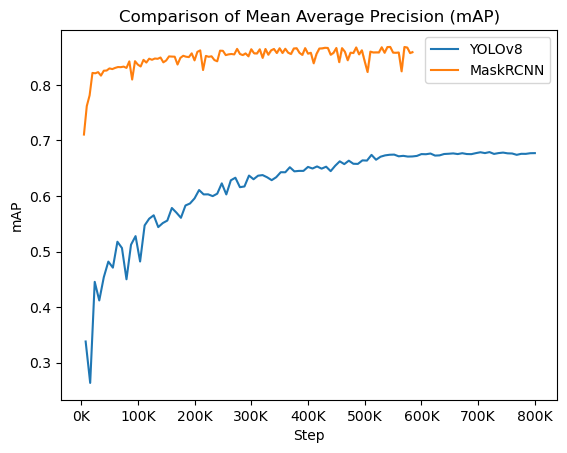

In [45]:
plt.figure()
plt.title("Comparison of Mean Average Precision (mAP)")
plt.xlabel("Step")
plt.ylabel("mAP")
g = sns.lineplot(data=map50_df, dashes=False)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)
plt.show()

In [46]:
map50_df.max()

YOLOv8      0.679110
MaskRCNN    0.868433
dtype: float64